In [215]:
%matplotlib inline
%run upload_and_vizualize 
%run classify_and_evaluate 
%run aux
import csv
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pylab as pl


# Part 1 Read and Load Data

Purpose:
To develop a model that will classify whether or not a household will face financial distress over the next two years.  This can help us develop a policy intervention to address this distress.  

In [118]:
credit_data = read_file('credit-data.csv')
copy_data = credit_data.copy(deep=True)

In [51]:
data_dict =read_file('Data Dictionary.xls')

In [52]:
data_dict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,zipcode,zipcode of the borrower,interget/string
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


# Part 2 Explore Data

The first thing I would like to do as I begin to explore the data is understand the distributions of the data by column.

In [47]:
all_cols, all_cols_caps, pt_columns = list_describe(credit_data,'NumberOfTime')

            PersonID
count  150000.000000
mean    75000.500000
std     43301.414527
min         1.000000
25%     37500.750000
50%     75000.500000
75%    112500.250000
max    150000.000000 

       SeriousDlqin2yrs
count     150000.000000
mean           0.066840
std            0.249746
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000 

       RevolvingUtilizationOfUnsecuredLines
count                         150000.000000
mean                               6.048438
std                              249.755371
min                                0.000000
25%                                0.029867
50%                                0.154181
75%                                0.559046
max                            50708.000000 

                 age
count  150000.000000
mean       52.295207
std        14.771866
min         0.000000
25%        41.000000
50%        52.000000
75%        63.000000
max       109.000000 

  

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


I also want to see if there are any missing values. This will inform how I impute data into the columns where there are missing values.

In [144]:
check_na(credit_data)

value,False,True
variable,,
DebtRatio,150000,0
MonthlyIncome,120269,29731
NumberOfDependents,146076,3924
NumberOfOpenCreditLinesAndLoans,150000,0
NumberOfTime30-59DaysPastDueNotWorse,150000,0
NumberOfTime60-89DaysPastDueNotWorse,150000,0
NumberOfTimes90DaysLate,150000,0
NumberRealEstateLoansOrLines,150000,0
PersonID,150000,0


Now, since I notice that the column "NumberOfDependents" has missing values, I'm curious to look at a more granular view of the data. I would like to see what percentage of a given number of dependents is of the entire data set.

In [143]:
df = des_num_dep(credit_data,'NumberOfDependents')

In [26]:
df

,NumberOfDependents,cumsum,percentage
0.0,86902,86902,59.490950
1.0,26316,113218,77.506230
2.0,19522,132740,90.870506
3.0,9483,142223,97.362332
4.0,2862,145085,99.321586
5.0,746,145831,99.832279
6.0,158,145989,99.940442
7.0,51,146040,99.975355
8.0,24,146064,99.991785
10.0,5,146069,99.995208


Now, I will use an area graph to try and get an elementary understanding of any possible relationship between number of dependents and serious financial delinquency 2 years after the study.

In [50]:
cross_vectors(credit_data, 'NumberOfDependents', 'SeriousDlqin2yrs')

SeriousDlqin2yrs,0,1
NumberOfDependents,,
0.0,81807,5095
1.0,24381,1935
2.0,17938,1584
3.0,8646,837
4.0,2565,297
5.0,678,68
6.0,134,24
7.0,46,5
8.0,22,2


(0, 11)

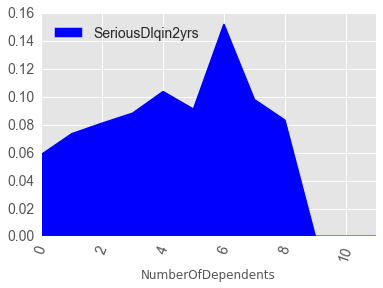

In [168]:
create_area_graphs(credit_data,'NumberOfDependents',None,'SeriousDlqin2yrs','blue')
plt.xlim(0,11)

I also wanted to create a quick way to take a look at the other distributions with one function.  I figured creating a distribution for zipcode would be unnececssary since I would not be using it as a feature.  I am not using zipcode because I want to have a more general model that can include zipcodes outside the given dataset.

/Users/andrewyaspan/Documents/capp30254/hws/HW2/upload_and_vizualize.py:131: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  df.boxplot(column=column_name, ax = ax2); ax2.set_title('Boxplot of '+column_name)


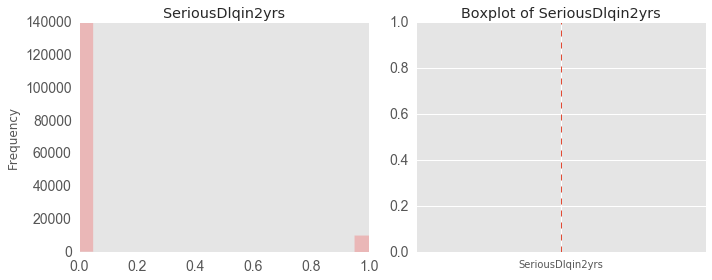

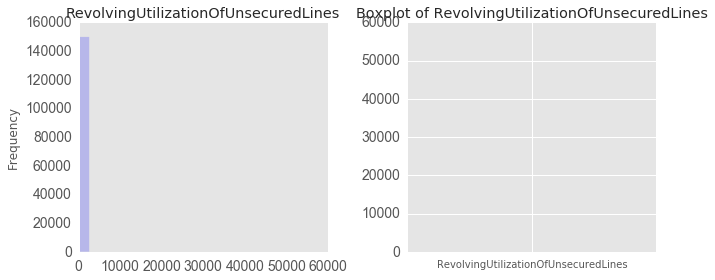

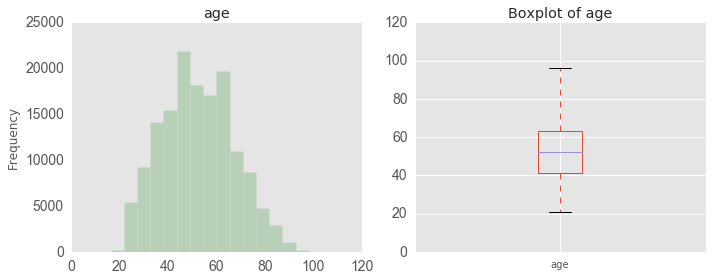

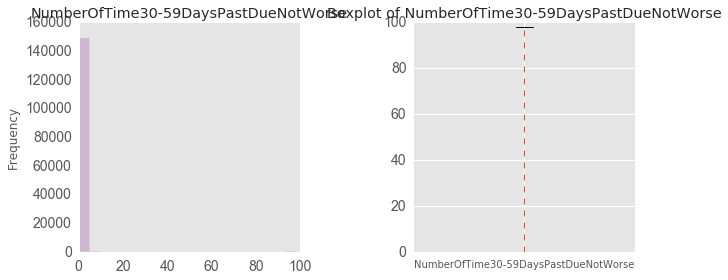

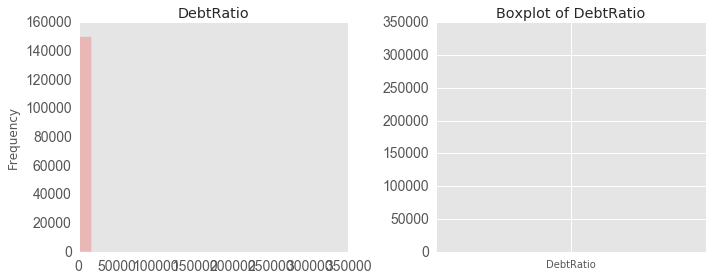

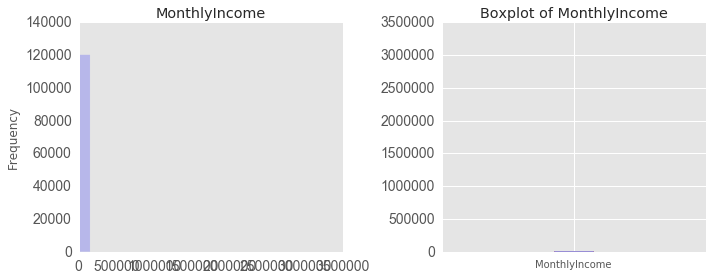

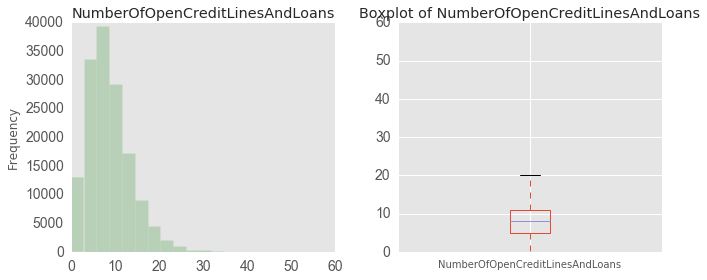

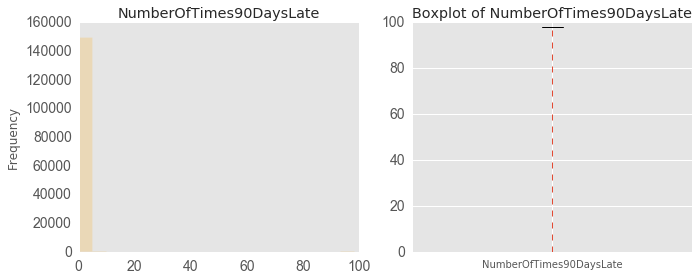

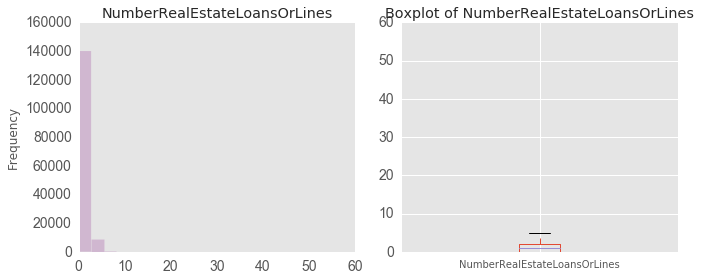

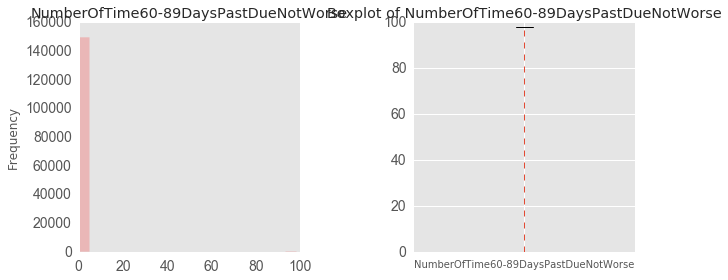

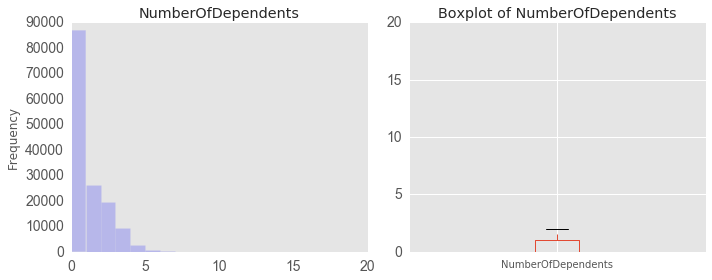

In [166]:
ignore_cols = ['zipcode']
create_hist_box(credit_data,all_cols_caps,ignore_cols)

Now, since it is hard to read and get anything out of income histogram, but I notice that the boxplot has a concentration of values in one place and a few values that are significantly larger, I would like to look at specific parts of the distribution with "zoomed-in" histograms.  Not surprisingly, there is a large incomes in disparity with only  a very small percentage of income earners making very large salaries each year.

/Users/andrewyaspan/Documents/capp30254/hws/HW2/upload_and_vizualize.py:180: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  credit_data.boxplot(column=column_name, ax = ax1); ax1.set_title('Overall '+column_name)


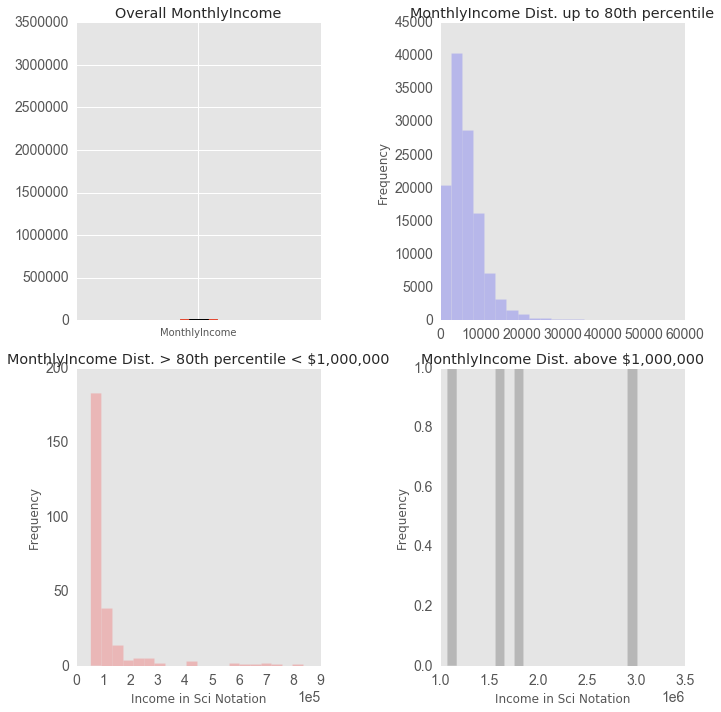

In [177]:
 special_plot(credit_data, 'MonthlyIncome',54166, 1000000)

In [29]:
credit_data.MonthlyIncome.max()

3008750.0

I am also interested in observing any pre-model relationships between monthly income and serious delinquincy 2 years later. Similarly, there may be a relationship to be observed between age of parent and delinquincy.

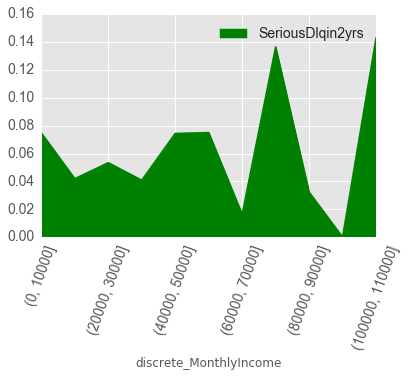

In [180]:

create_area_graphs(credit_data,'MonthlyIncome',income_ranges,'SeriousDlqin2yrs','green')


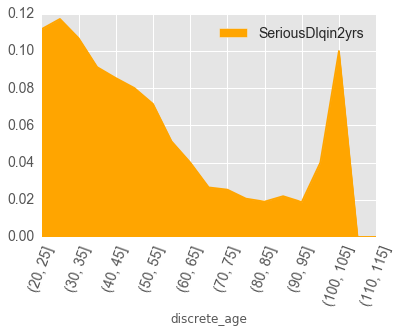

In [164]:
age_ranges = range(20,120,5)
income_ranges = range(0,120000,10000)

create_line_graphs(credit_data,'age',age_ranges,'SeriousDlqin2yrs','orange')

NOTE: All that are missing monthly_income are also missing number of dependents

In [53]:
null_monthly_income_or_null_dependents = credit_data[credit_data.MonthlyIncome.isnull()| credit_data.NumberOfDependents.isnull()]
null_monthly_income_alone = credit_data[credit_data.MonthlyIncome.isnull()]


In [54]:
check_diff(null_monthly_income_alone,null_monthly_income_or_null_dependents)

0

In [55]:
credit_data.NumberOfDependents.median()

0.0

According to the following article: #https://www.consumerfinance.gov/askcfpb/1791/what-debt-income-ratio-why-43-debt-income-ratio-important.html
having a debt-income-ratio below 43% is ideal. So I made this column, but was reluctant to use it in the model.

In [184]:
#http://www.investopedia.com/university/ratios/debt/ratio2.asp

group_names = ['dr_very_low','dr_low','dr_moderately_low','dr_slightly_high','dr_high','dr_extremely_high']
bins = [float(-1),float(.20),float(.40),float(.60),float(.80),float(1.00),float(329665)]

copy_data['dr_category'] = pd.cut(copy_data.DebtRatio, bins, labels=group_names)

#These would then be turned into dummy variables and utilized in tests later

In [188]:
cross_vectors(copy_data, 'dr_category', 'SeriousDlqin2yrs')

SeriousDlqin2yrs,0,1
dr_category,,
dr_very_low,39704,2585
dr_low,36128,2156
dr_moderately_low,19866,1656
dr_slightly_high,7931,893
dr_high,3499,445
dr_extremely_high,32846,2291


A pretty significant number of households have very high debt-ratios, from looking at this table, it doesnt seem like this is very determinant of delinquincy (however having lower debt-ratios doesn't hurt).  I did wonder how age and debt were related, however, so I created the below.

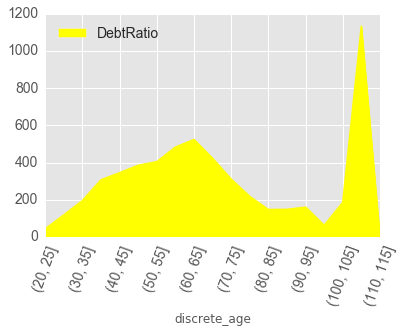

In [191]:
create_line_graphs(copy_data,'age',age_ranges,'DebtRatio','yellow')

According to the following source: http://www.creditcards.com/credit-card-news/credit-utilization-fico-1270.php. It is good to have a revolving utilization rate below 30%.  So I made this column, but was reluctant to use it in the model.

In [185]:

group_names = ['rvus_low','rvus_moderately_low', 'rvus_high','rvus_extremely_high']
bins = [float(-1),float(.33),float(.66),float(1.00),float(507089)]

copy_data['rvus_category'] = pd.cut(copy_data.RevolvingUtilizationOfUnsecuredLines, bins, labels=group_names)

#These would then be turned into dummy variables and utilized in tests later

In [197]:
cross_vectors(copy_data, 'rvus_category', 'SeriousDlqin2yrs')

SeriousDlqin2yrs,0,1
rvus_category,,
rvus_low,93487,2212
rvus_moderately_low,20675,1648
rvus_high,23728,4929
rvus_extremely_high,2084,1237


Unlike debt-ratios, not so many households had high revolving utilization of unsecured credit lineshigh debt-ratios, from lookin at this table, it doesnt seem like this is very determinant of delinquincy (however having lower revolving credit doesn't hurt).  I did wonder how age and debt were related, however, so I created the below.

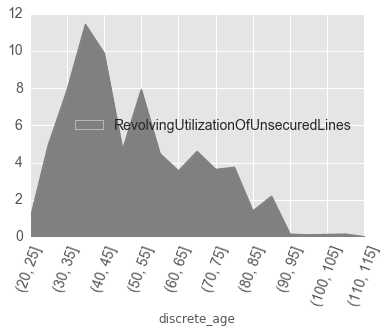

In [200]:
create_line_graphs(copy_data,'age',age_ranges,'RevolvingUtilizationOfUnsecuredLines','grey')

# Part 3 & 4 Preprocessing + Generating Features and Predictors

In discussing the process of imputing data with classmates.  One pointed out the importance of considering data leakage as you go through the process of generating features and creating training and testing sets.  In order to prevent leakage before imputation, I split my training and testing sets right away and implemented parallel functions on each.

In [56]:
#split data before imputation
X_train,X_test,y_train,y_test = split_data(credit_data, use_seed=None)
X_train['age'].replace(0, X_train['age'].mean(), inplace = True)

In [57]:
#impute by the median
credit_imputed_train = preprocess_imputer(X_train)
credit_imputed_test = preprocess_imputer(X_test)
credit_imputed_train = pd.DataFrame(credit_imputed_train).rename(columns = all_cols).drop(['serious_dlqin2yrs','zipcode'],axis=1)
credit_imputed_test = pd.DataFrame(credit_imputed_test).rename(columns = all_cols).drop(['serious_dlqin2yrs','zipcode'],axis=1)

Based on the distribution of income, it made to impute by median as opposed to mean.  The reason I did this is because the mean is very sensitive to large values, even if there are not so many of them.  The median bases the average on the value at the numeric center of the distribution.

In [61]:
credit_imputed_train['monthly_income'] = StandardScaler().fit_transform(credit_imputed_train['monthly_income'])
credit_imputed_test['monthly_income'] = StandardScaler().fit_transform(credit_imputed_test['monthly_income'])

/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/andrewyaspan/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X

# Part 5 & 6 Build and Evaluate Classifier

Before seeing how the model worked, I'm interested to look at the distribution of the outcome variable from the test.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb44cf8>]], dtype=object)

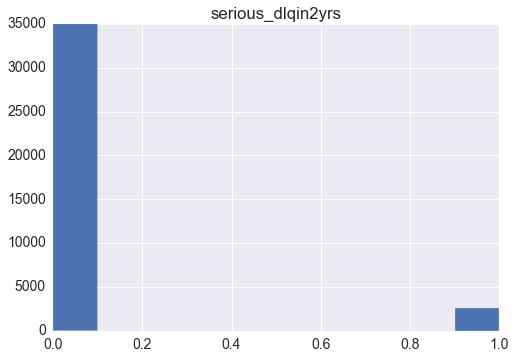

In [134]:
df_y_test = pd.DataFrame(y_test).rename(columns={'SeriousDlqin2yrs':'serious_dlqin2yrs'})
df_y_test.hist()

Conveniently, sklearn has a function that can select the best features of a given dataset for a given model for you.  I utilized this function for logistic regression.  I chose logistic regression because we are trying to develop a probability for whether or not a household will have serious financial delinquincy after 2 years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11720fd30>]], dtype=object)

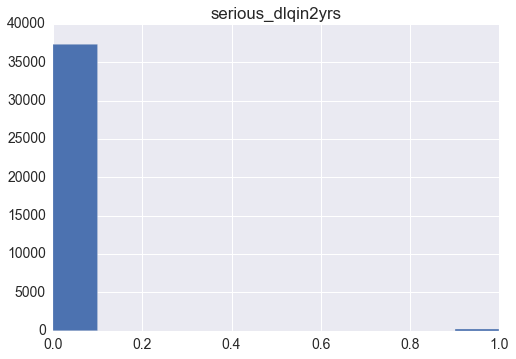

In [122]:

pred, best_features = model_logistic(credit_imputed_train, y_train, credit_imputed_test)
df_y_pred = pd.DataFrame(pred).rename(columns=all_cols)

df_y_pred.hist()

Sklearn has an accuracy function, which I used to evaluate my logistic regression...

In [72]:
accuracy(y_test, df_y_pred)

0.93234824281150164

In [88]:
[all_cols[col] for col in list(best_features)]

['age',
 'number_of_time30-59_days_past_due_not_worse',
 'monthly_income',
 'number_of_times90_days_late',
 'number_real_estate_loans_or_lines']

...however, after todays Machine Learning class I wanted to create a confusion matrix to get a better understanding of precision and recall.

I would like to thank Juan who...would like to thank Ibrahim Gabr's Machine-Learning-Playgroung for the following code
@Misc{igabr, author = {Ibrahim, Gabr}, title = {Machine-Learning-Playground}, year = {2017}, publisher = {GitHub}, journal = {GitHub repository}, howpublished = {\urlhttps://github.com/igabr/Machine-Learning-Playground/blob/master/Pipeline%20Building/Confusion%20Matrix%20Explanation.ipynb}, commit = {81b9983676127c06ece4a6c23a76c98472cfd4e6} }

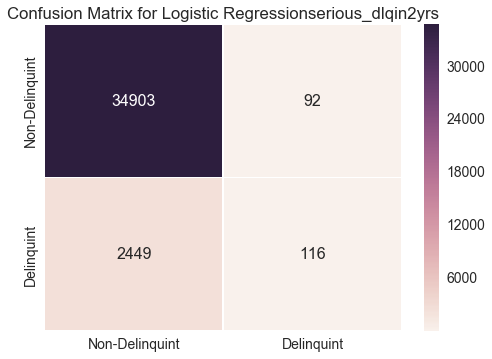

In [211]:
create_confusion_matrix(df_y_test,df_y_pred,'serious_dlqin2yrs',['Non-Delinquint','Delinquint'], 'Logistic Regression')

In [208]:
precision = 34903/(34903+2449)
precision

0.9344345684300707

If a policy intervention is being implemented by risk-averse officials, we can now say that we believe that an intervention based on this model meant not to cover those likely to be detected as non-delinquint will not leave too many people to be in need of the intervention out. 

In [210]:
recall = 39043/(39043+116)
recall

0.9970377180214